# Compilacion de metnum.cpp

In [2]:
!cd .. && mkdir build
!cd ../build/ && rm -rf *
!cd ../build && cmake \
  -DPYTHON_EXECUTABLE="$(which python)" \
  -DCMAKE_BUILD_TYPE=Release ..
!cd ../build && make install

mkdir: cannot create directory ‘build’: File exists
-- The C compiler identification is GNU 7.5.0
-- The CXX compiler identification is GNU 7.5.0
-- Check for working C compiler: /usr/bin/cc
-- Check for working C compiler: /usr/bin/cc -- works
-- Detecting C compiler ABI info
-- Detecting C compiler ABI info - done
-- Detecting C compile features
-- Detecting C compile features - done
-- Check for working CXX compiler: /usr/bin/c++
-- Check for working CXX compiler: /usr/bin/c++ -- works
-- Detecting CXX compiler ABI info
-- Detecting CXX compiler ABI info - done
-- Detecting CXX compile features
-- Detecting CXX compile features - done
Release mode
-- Found PythonInterp: /home/luis/.pyenv/shims/python (found version "3.6.5") 
-- Found PythonLibs: /home/luis/.pyenv/versions/3.6.5/lib/libpython3.6m.a
-- pybind11 v2.2.4
-- Performing Test HAS_FLTO
-- Performing Test HAS_FLTO - Success
-- LTO enabled
CMAKE_INSTALL_PREFIX=/home/luis/Documents/2020-Metodos/MetNum/tp2
-- Configuring done
--

In [2]:
# Verifico la correcta instalación. Si no falla el import está OK
!pwd
!python --version
import metnum

/home/luis/Documents/2020-Metodos/MetNum/tp2/notebooks
Python 3.6.5


## Explorando los datos

In [3]:
%load_ext autoreload
%autoreload 2
import pandas as pd

df_train = pd.read_csv("../data/train.csv")

Es un csv, con columnas por cada pixel

In [5]:
df_train[:10]

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Reducir el dataset
Ya que el dataset es grande, me quedo con una porción de éste

**<font color=red>ESTO ES SOLO PARA HACER PRUEBAS. CUANDO REPORTEN LOS RESULTADOS, USAR DATASET COMPLETO

In [17]:
#df_train = df_train[:2000]

En el primer caracter está el dígito a reconocer. Llamamos a esto y_train

In [4]:
# Uso values para mandar todo a arrays de numpy
X = df_train[df_train.columns[1:]].values
y = df_train["label"].values.reshape(-1, 1)

X.shape, y.shape

((42000, 784), (42000, 1))

Convierto el resto a matrices de 28 x 28

A ver cómo se ven...

Supuestamente es un 7


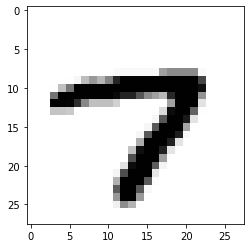

In [7]:
import matplotlib.pyplot as plt

num = 1917

print(f"Supuestamente es un {int(y[num])}")

img = X[num].reshape(28, 28)
plt.imshow(img, cmap="Greys")

### Balance de clases

¿Tenemos la misma cantidad de cada número?

In [20]:
df_train["label"].value_counts(normalize=True)

1    0.111524
7    0.104786
3    0.103595
9    0.099714
2    0.099452
6    0.098500
0    0.098381
4    0.096952
8    0.096738
5    0.090357
Name: label, dtype: float64

No: tenemos más 1 que 5, pero tampoco está tan desbalanceado

### Conjunto de development

In [21]:
limit = int(0.8 * X.shape[0]) 

X_train, y_train = X[:limit], y[:limit]
X_val, y_val = X[limit:], y[limit:]

assert len(X_train) == len(y_train)
assert len(X_val) == len(y_val)

print(f"Ahora tengo {len(X_train)} instancias de entrenamiento y {len(X_val)} de validación")

Ahora tengo 33600 instancias de entrenamiento y 8400 de validación


In [30]:
from sklearn.neighbors import KNeighborsClassifier

# Acá pueden cambiar el clasificador nuestro por el de sklearn!

clf = metnum.KNNClassifier(100)
#clf = KNeighborsClassifier(100)

clf.fit(X_train, y_train)

/home/leandro/Downloads/MetodosNumericos/MetodosTp2/metnum-tp2-2c2020/virtualEnvTp2/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=100, p=2,
           weights='uniform')

In [ ]:
%%time
from sklearn.metrics import accuracy_score
y_pred = clf.predict(X_val)

acc = accuracy_score(y_val, y_pred)
print("Accuracy: {}".format(acc))

# Análisis de k para kNN

Accuracy number 1 is 0.9025
Precision number 1 is 0.9025
knnTime number 1 is 1.4748706817626953
Accuracy number 2 is 0.9025
Precision number 2 is 0.9025
knnTime number 2 is 1.4431874752044678
Accuracy number 3 is 0.9125
Precision number 3 is 0.9125
knnTime number 3 is 1.4488928318023682
Accuracy number 4 is 0.9025
Precision number 4 is 0.9025
knnTime number 4 is 1.4851820468902588
Accuracy number 5 is 0.8925
Precision number 5 is 0.8925
knnTime number 5 is 1.5274181365966797
Accuracy number 6 is 0.8925
Precision number 6 is 0.8925
knnTime number 6 is 1.530008316040039
Accuracy number 7 is 0.9
Precision number 7 is 0.9
knnTime number 7 is 1.8122656345367432
Accuracy number 8 is 0.895
Precision number 8 is 0.895
knnTime number 8 is 1.7049720287322998
Accuracy number 9 is 0.8925
Precision number 9 is 0.8925
knnTime number 9 is 1.4632155895233154
Accuracy number 10 is 0.89
Precision number 10 is 0.89
knnTime number 10 is 1.550898551940918
Accuracy number 11 is 0.8825
Precision number 11 is

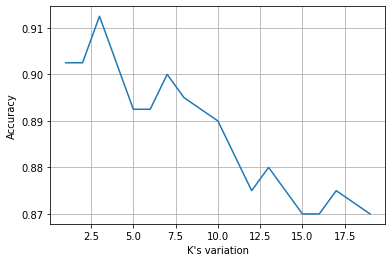

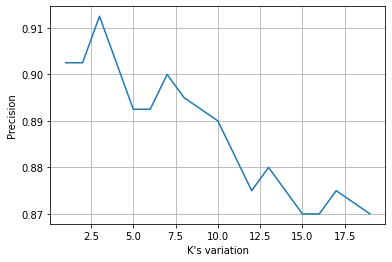

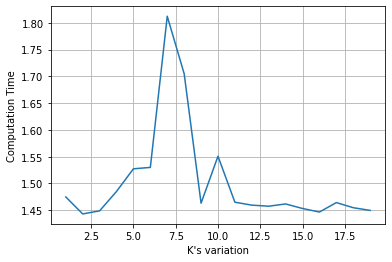

CPU times: user 29.2 s, sys: 64.6 ms, total: 29.3 s
Wall time: 29.1 s


In [19]:
%%time
from sklearn.metrics import accuracy_score, precision_score
from time import time
import numpy as np

total_accuracies = []
total_precisions = []
total_knnTimes = []

# Los k que voy a probar están entre 0 y 49
k_list = np.arange(1,20)

for k in k_list:
    # Tomo el tiempo antes de iniciar la ejecución del algoritmo knn
    knnTime_start = time()
    
    # Ejecuto el algoritmo de metnum.cpp
    metNumClassifier = metnum.KNNClassifier(k)
    metNumClassifier.fit(X_train, y_train)
    y_pred = metNumClassifier.predict(X_val)
    
    # Tomo el tiempo al finalizar la ejecución del algoritmo y voy guardando los resultados
    knnTime_end = time()
    knnTime = knnTime_end - knnTime_start
    
    # Uso las metricas de sklearn para calcular el accuracy y la precisión
    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred, average='micro')
    
    print(f"Accuracy number {k} is {accuracy}")
    print(f"Precision number {k} is {precision}")
    print(f"knnTime number {k} is {knnTime}")
    
    # Voy guardando los resultados parciales en las listas correspondientes
    total_knnTimes.append(knnTime)
    total_accuracies.append(accuracy)
    total_precisions.append(precision)
    
total_knnTimes = np.asarray(total_knnTimes)
total_accuracies = np.asarray(total_accuracies)
total_precisions = np.asarray(total_precisions)

mean_knnTimes = np.mean(total_knnTimes)
mean_accuracies = np.mean(total_accuracies)
mean_precisions = np.mean(total_precisions)

std_deviation_knnTimes = np.std(total_knnTimes)
std_deviation_accuracies = np.std(total_accuracies)
std_deviation_precisions = np.std(total_precisions)

plt.figure("Accuracies by k variation")
plt.plot(k_list, total_accuracies)
plt.grid()
plt.xlabel("K's variation")
plt.ylabel("Accuracy")
plt.savefig("ExperimentResults/FinalAccuracies_variation_by_k_20-50.png")
plt.show()

plt.figure("Precisions by k variation")
plt.plot(k_list, total_precisions)
plt.grid()
plt.xlabel("K's variation")
plt.ylabel("Precision")
plt.savefig("ExperimentResults/FinalPrecisions_variation_by_k_20-50.png")
plt.show()

plt.figure("Computation time by k variation")
plt.plot(k_list, total_knnTimes)
plt.grid()
plt.xlabel("K's variation")
plt.ylabel("Computation Time")
plt.savefig("ExperimentResults/FinalComputeTime_variation_by_k_20-50.png")
plt.show()

# Análisis de alpha para PCA y KNN

Para el análisis del alpha, vamos a utilizar el valor de k=10 para Knn, porque en el item anterior determinamos
que se trata de la cantidad de vecinos óptima resultante de la comparación con las métricas utilizadas.

Accuracy number 1 is 0.09654761904761905
Precision number 1 is 0.09654761904761905
knnTime number 1 is 9.45986795425415
Accuracy number 2 is 0.09654761904761905
Precision number 2 is 0.09654761904761905
knnTime number 2 is 9.220737218856812
Accuracy number 3 is 0.09654761904761905
Precision number 3 is 0.09654761904761905
knnTime number 3 is 10.357177734375
Accuracy number 4 is 0.09654761904761905
Precision number 4 is 0.09654761904761905
knnTime number 4 is 9.568627119064331
Accuracy number 5 is 0.09654761904761905
Precision number 5 is 0.09654761904761905
knnTime number 5 is 11.306557893753052
Accuracy number 6 is 0.09654761904761905
Precision number 6 is 0.09654761904761905
knnTime number 6 is 11.073029279708862
Accuracy number 7 is 0.09654761904761905
Precision number 7 is 0.09654761904761905
knnTime number 7 is 11.116016626358032
Accuracy number 8 is 0.2425
Precision number 8 is 0.2425
knnTime number 8 is 19.77546000480652
Accuracy number 9 is 0.4990476190476191
Precision number 9

Accuracy number 68 is 0.8908333333333334
Precision number 68 is 0.8908333333333334
knnTime number 68 is 105.00823068618774
Accuracy number 69 is 0.8888095238095238
Precision number 69 is 0.8888095238095238
knnTime number 69 is 105.48896670341492
Accuracy number 70 is 0.8873809523809524
Precision number 70 is 0.8873809523809524
knnTime number 70 is 106.84274625778198
Accuracy number 71 is 0.47285714285714286
Precision number 71 is 0.47285714285714286
knnTime number 71 is 108.85778522491455
Accuracy number 72 is 0.8886904761904761
Precision number 72 is 0.8886904761904761
knnTime number 72 is 107.92631483078003
Accuracy number 73 is 0.7189285714285715
Precision number 73 is 0.7189285714285715
knnTime number 73 is 108.26433253288269
Accuracy number 74 is 0.8678571428571429
Precision number 74 is 0.8678571428571429
knnTime number 74 is 114.2681794166565
Accuracy number 75 is 0.8726190476190476
Precision number 75 is 0.8726190476190476
knnTime number 75 is 115.00998306274414
Accuracy number

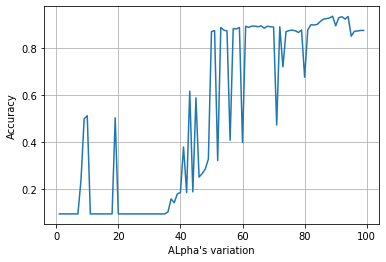

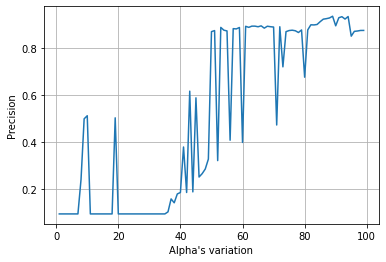

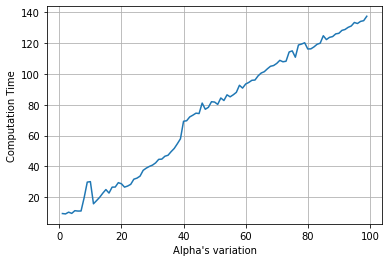

CPU times: user 2h 3min 28s, sys: 37.5 s, total: 2h 4min 6s
Wall time: 2h 3min 49s


In [22]:
%%time

from sklearn.metrics import accuracy_score, precision_score
from time import time
import numpy as np

# Los alpha que voy a probar están entre 0 y 49
alpha_list = np.arange(100,200)

total_accuracies = []
total_precisions = []
total_pcaTimes = []

for alpha in alpha_list:
    
    # Tomo el tiempo antes de iniciar la ejecución del algoritmo pca
    pcaTime_start = time()
    
    # Ejecuto el algoritmo de pca de metnum.cpp
    # Transformo las instancias de entrenamiento
    pca = metnum.PCA(int(alpha))
    pca.fit(X_train)
    X_train_transformed = pca.transform(X_train)
    # Transformo las instancias de validacion
    X_val_transformed = pca.transform(X_val)
    
    # Ejecuto el algoritmo de knn de metnum.cpp, teniendo en cuenta que uso los datos transformados, y k=10
    metNumClassifier = metnum.KNNClassifier(4)
    metNumClassifier.fit(X_train_transformed, y_train)
    y_pred = metNumClassifier.predict(X_val_transformed)
    
    # Tomo el tiempo al finalizar la ejecucion del algoritmo pca + knn
    pcaTime_end = time()
    pcaTime = pcaTime_end - pcaTime_start
    
    # Uso las metricas de sklearn para calcular el accuracy y la precisión
    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred, average='micro')
    
    print(f"Accuracy number {alpha} is {accuracy}")
    print(f"Precision number {alpha} is {precision}")
    print(f"knnTime number {alpha} is {pcaTime}")
    
    # Voy guardando los resultados parciales en las listas correspondientes
    total_pcaTimes.append(pcaTime)
    total_accuracies.append(accuracy)
    total_precisions.append(precision)

total_pcaTimes = np.asarray(total_pcaTimes)
total_accuracies = np.asarray(total_accuracies)
total_precisions = np.asarray(total_precisions)

mean_pcaTimes = np.mean(total_pcaTimes)
mean_accuracies = np.mean(total_accuracies)
mean_precisions = np.mean(total_precisions)

std_deviation_pcaTimes = np.std(total_pcaTimes)
std_deviation_accuracies = np.std(total_accuracies)
std_deviation_precisions = np.std(total_precisions)
    
plt.figure("Accuracies by alpha variation")
plt.plot(alpha_list, total_accuracies)
plt.grid()
plt.xlabel("ALpha's variation")
plt.ylabel("Accuracy")
plt.savefig("ExperimentResults/FinalAccuracies_variation_by_alpha_100-200.png")
plt.show()

plt.figure("Precisions by alpha variation")
plt.plot(alpha_list, total_precisions)
plt.grid()
plt.xlabel("Alpha's variation")
plt.ylabel("Precision")
plt.savefig("ExperimentResults/FinalPrecisions_variation_by_alpha_100-200.png")
plt.show()

plt.figure("Computation time by alpha variation")
plt.plot(alpha_list, total_pcaTimes)
plt.grid()
plt.xlabel("Alpha's variation")
plt.ylabel("Computation Time")
plt.savefig("ExperimentResults/FinalComputeTime_variation_by_alpha_100-200.png")
plt.show()

# Experimento 4:
### Variación del tiempo de computo en relación al conjunto de entrenamiento

In [24]:
from time import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [25]:
import metnum

df_train = pd.read_csv("../data/train.csv")

# Uso values para mandar todo a arrays de numpy
X = df_train[df_train.columns[1:]].values
y = df_train["label"].values.reshape(-1, 1)

X.shape, y.shape

((42000, 784), (42000, 1))

## Metodo: kNN (con k=4 por Exp1)

In [22]:
%%time
columnas = ["tamaño", "tiempo"]
filas_res = []
k=4
K=10

# Para los scores
col_scores=["tamaño","accuracy","precision","recall","f1_score"]
list_scores=[]

# Variamos el tamaño del conjunto de entrenamiento entre 100 y el total del dataset de MNIST
step = 3000
limit = X.shape[0]
#step = 200
#limit = 1000
iteraciones = 2
for tam_total in range(0,limit+1,step):
    if tam_total == 0: tam_total = 100
    # En base a la cantidad de particiones, calcula el tamaño del train set
    new_shape = int((tam_total*(K-1))/K)
    # Seteo el tamaño del conjunto de train
    X_train, y_train = X[:new_shape], y[:new_shape]
    X_val, y_val = X[new_shape:tam_total], y[new_shape:tam_total]
    print(f"Train set: {len(X_train)} \t Test set:{len(X_val)} \t Total: {tam_total}")
    for i in range(iteraciones):
        # Start time---------------------------------
        ejec_time_start = time()
        # Ejecuto el algoritmo de metnum.cpp
        metNumClassifier = metnum.KNNClassifier(k)
        metNumClassifier.fit(X_train, y_train)
        y_pred = metNumClassifier.predict(X_val)
        # End time-----------------------------------
        ejec_time_end = time()
        ejec_time = ejec_time_end - ejec_time_start
        
        # Guardo el resultado del tiempo y el tamaño en esa iteracion
        fila = []
        fila.append(new_shape)
        fila.append(ejec_time)
        filas_res.append(fila)
    
    #Score calc
    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred, average='micro')
    recall = recall_score(y_val, y_pred, average='micro')
    f1Score = f1_score(y_val, y_pred, average='micro')
    list_score_aux = []
    list_score_aux.append(new_shape)
    list_score_aux.append(accuracy)
    list_score_aux.append(precision)
    list_score_aux.append(recall)
    list_score_aux.append(f1Score)
    list_scores.append(list_score_aux)

print("TERMINADO!")
resultado = pd.DataFrame(filas_res, columns=columnas)
resultado.to_csv(F"Exp4/resultado_exp4_kNN.csv", index=False, header=True);

resultado_metrics = pd.DataFrame(list_scores, columns=col_scores)
resultado_metrics.to_csv(F"Exp5/metrics_exp5_kNN.csv", index=False, header=True);



Train set: 90 	 Test set:10 	 Total: 100
Train set: 180 	 Test set:20 	 Total: 200
Train set: 360 	 Test set:40 	 Total: 400
Train set: 540 	 Test set:60 	 Total: 600
Train set: 720 	 Test set:80 	 Total: 800
Train set: 900 	 Test set:100 	 Total: 1000
TERMINADO!
CPU times: user 1.42 s, sys: 0 ns, total: 1.42 s
Wall time: 1.41 s


<Figure size 432x288 with 0 Axes>

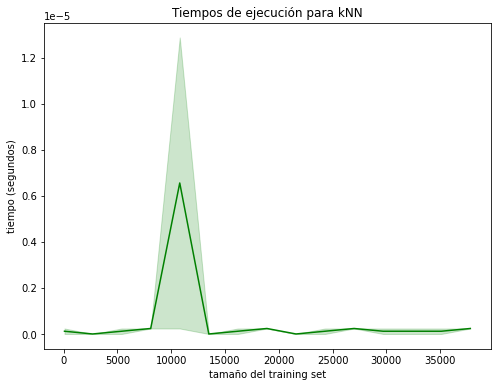

In [4]:
df_tiempos_kNN = pd.read_csv('Exp4/resultado_exp4_kNN.csv')
plt.figure()
plt.figure(figsize=(8,6))
gr = sns.lineplot(x = "tamaño", y = 'tiempo', data = df_tiempos_kNN, color = 'green')

gr.set_title("Tiempos de ejecución para kNN")
gr.set_ylabel("tiempo (segundos)")
gr.set_xlabel("tamaño del training set")

fig = gr.get_figure()
name = "exp4_tiempos_kNN"

fig.savefig(f"Exp4/{name}.png")

## Metodo: kNN + PCA (con k=4 por Exp1 y alpha=53 o 94)

In [23]:
%%time
columnas = ["tamaño", "tiempo", "alpha"]
filas_res = []
k=4
K=10
alphas=[34,94]

# Para los scores
col_scores=["tamaño","alpha","accuracy","precision","recall","f1_score"]
list_scores=[]

# Variamos el tamaño del conjunto de entrenamiento entre 100 y el total del dataset de MNIST
step = 3000
limit = X.shape[0]
#step = 200
#limit = 1000
iteraciones = 2
for tam_total in range(0,limit+1,step):
    if tam_total == 0: tam_total = 100
    # En base a la cantidad de particiones, calcula el tamaño del train set
    new_shape = int((tam_total*(K-1))/K)
    # Seteo el tamaño del conjunto de train
    X_train, y_train = X[:new_shape], y[:new_shape]
    X_val, y_val = X[new_shape:tam_total], y[new_shape:tam_total]
    print(f"Train set: {len(X_train)} \t Test set:{len(X_val)} \t Total: {tam_total}")
    for alpha in alphas:
        for i in range(iteraciones):
            # Start time---------------------------------
            ejec_time_start = time()

            # Ejecuto el algoritmo de pca de metnum.cpp
            # Transformo las instancias de entrenamiento
            pca = metnum.PCA(int(alpha))
            pca.fit(X_train)
            X_train_transformed = pca.transform(X_train)
            # Transformo las instancias de validacion
            X_val_transformed = pca.transform(X_val)
            # Ejecuto el algoritmo de knn de metnum.cpp, teniendo en cuenta que uso los datos transformados, y k=10
            metNumClassifier = metnum.KNNClassifier(k)
            metNumClassifier.fit(X_train_transformed, y_train)
            y_pred = metNumClassifier.predict(X_val_transformed)

            # End time-----------------------------------
            ejec_time_end = time()
            ejec_time = ejec_time_end - ejec_time_start
            
            # Guardo el resultado del tiempo y el tamaño en esa iteracion
            fila = []
            fila.append(new_shape)
            fila.append(ejec_time)
            fila.append(f"alpha_{alpha}")
            filas_res.append(fila)

        #Score calc
        accuracy = accuracy_score(y_val, y_pred)
        precision = precision_score(y_val, y_pred, average='micro')
        recall = recall_score(y_val, y_pred, average='micro')
        f1Score = f1_score(y_val, y_pred, average='micro')
        list_score_aux = []
        list_score_aux.append(new_shape)
        list_score_aux.append(alpha)
        list_score_aux.append(accuracy)
        list_score_aux.append(precision)
        list_score_aux.append(recall)
        list_score_aux.append(f1Score)
        list_scores.append(list_score_aux)

print("TERMINADO!")
resultado = pd.DataFrame(filas_res, columns=columnas)
resultado.to_csv(F"Exp4/resultado_exp4_kNN-PCA.csv", index=False, header=True);

resultado_metrics = pd.DataFrame(list_scores, columns=col_scores)
resultado_metrics.to_csv(F"Exp5/metrics_exp5_kNN-PCA.csv", index=False, header=True);

Train set: 90 	 Test set:10 	 Total: 100
Train set: 180 	 Test set:20 	 Total: 200
Train set: 360 	 Test set:40 	 Total: 400
Train set: 540 	 Test set:60 	 Total: 600
Train set: 720 	 Test set:80 	 Total: 800
Train set: 900 	 Test set:100 	 Total: 1000
TERMINADO!
CPU times: user 2.17 s, sys: 0 ns, total: 2.17 s
Wall time: 2.16 s


<Figure size 432x288 with 0 Axes>

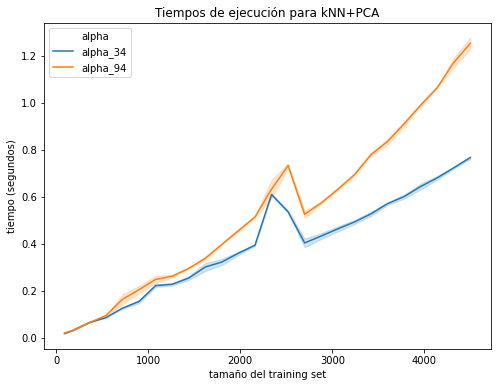

In [42]:
df_tiempos_kNN_PCA = pd.read_csv('Exp4/resultado_exp4_kNN-PCA.csv')
plt.figure()
plt.figure(figsize=(8,6))
gr = sns.lineplot(x = "tamaño", y = 'tiempo', data = df_tiempos_kNN_PCA, hue = "alpha")

gr.set_title("Tiempos de ejecución para kNN+PCA")
gr.set_ylabel("tiempo (segundos)")
gr.set_xlabel("tamaño del training set")

fig = gr.get_figure()
name = "exp4_tiempos_kNN-PCA"

fig.savefig(f"Exp4/{name}.png")

# Experimento 6:
###  Comparacion en tiempo kNN vs kNN+PCA

In [54]:
#Como los tiempos ya fueron calculados en el experimento 4
#Solo se tiene que hacer el analisis de los datos de kNN vs kNN+PCA

# Levanto los csv del exp4
df_tiempos_kNN = pd.read_csv('Exp4/resultado_exp4_kNN.csv')
df_tiempos_kNN_PCA = pd.read_csv('Exp4/resultado_exp4_kNN-PCA.csv')

# Agrego una nueva columna en el dataframe de kNN con el nombre del metodo
df_tiempos_kNN.insert(0, "metodo", "kNN")
# Renombro la columna de alphas por columna "metodo"
df_tiempos_kNN_PCA.rename(columns={'alpha': 'metodo'}, inplace=True)

# Uno los dataframes
list_dfs = [df_tiempos_kNN, df_tiempos_kNN_PCA]
df_tiempos = pd.concat(list_dfs, axis=0, ignore_index=True)


<Figure size 432x288 with 0 Axes>

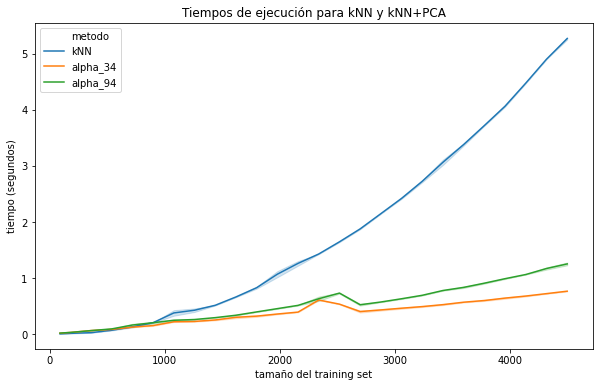

In [57]:
plt.figure()
plt.figure(figsize=(10,6))
gr = sns.lineplot(x = "tamaño", y = 'tiempo', data = df_tiempos, hue = "metodo")

gr.set_title("Tiempos de ejecución para kNN y kNN+PCA")
gr.set_ylabel("tiempo (segundos)")
gr.set_xlabel("tamaño del training set")

fig = gr.get_figure()
name = "exp6_tiempos"

fig.savefig(f"Exp6/{name}.png")